In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.api import OLS

In [3]:
time_df = pd.read_csv('acc_time_data.csv')
time_df['more_one_hour'] = (time_df['acceptance_time_min'] > 65)
geo_dict = {0: 'María Pinto', 1: 'San Pedro', 2: 'Independencia', 3: 'La Florida', 4: 'Lo Barnechea', 5: 'Lo Espejo', 6: 'Lo Prado', 7: 'Pedro Aguirre Cerda', 8: 'Pudahuel', 9: 'San Joaquín', 10: 'San Ramón', 11: 'El Monte', 12: 'Isla de Maipo', 13: 'Talagante', 14: 'Colina', 15: 'Lampa', 16: 'Tiltil', 17: 'Pirque', 18: 'Puente Alto', 19: 'San José de Maipo', 20: 'Buin', 21: 'Paine', 22: 'San Bernardo', 23: 'Alhué', 24: 'Curacaví', 25: 'Calera de Tango', 26: 'Melipilla', 27: 'Cerrillos', 28: 'Cerro Navia', 29: 'Conchalí', 30: 'El Bosque', 31: 'Peñalolén', 32: 'Providencia', 33: 'Quilicura', 34: 'Vitacura', 35: 'Padre Hurtado', 36: 'Quinta Normal', 37: 'Recoleta', 38: 'Renca', 39: 'San Miguel', 40: 'Santiago', 41: 'Huechuraba', 42: 'La Cisterna', 43: 'La Granja', 44: 'La Pintana', 45: 'La Reina', 46: 'Las Condes', 47: 'Macul', 48: 'Maipú', 49: 'Ñuñoa', 50: 'Peñaflor', 51: 'Estación Central'}
columns_dict = {f'ft_has_geo_{key}': f'ft_has_geo_{name.lower().replace(" ","_")}' for (key,name) in geo_dict.items()}
time_df.rename(columns=columns_dict, inplace=True)
time_df

,id_route,acceptance_time_min,ft_size,ft_size_drops,ft_size_pickups,ft_size_geo,ft_inter_geo_dist,ft_has_geo_maría_pinto,ft_has_geo_san_pedro,ft_has_geo_independencia,...,ft_has_geo_la_granja,ft_has_geo_la_pintana,ft_has_geo_la_reina,ft_has_geo_las_condes,ft_has_geo_macul,ft_has_geo_maipú,ft_has_geo_ñuñoa,ft_has_geo_peñaflor,ft_has_geo_estación_central,more_one_hour
0,1,1.216667,25,19,6,3,0.245260,0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False
1,2,0.400000,16,11,5,5,1.522980,0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
2,3,0.616667,25,19,6,3,0.641472,0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,False
3,4,8.983333,20,15,5,4,0.693441,0.0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
4,5,61.583333,23,17,6,3,0.407975,0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,179,0.466667,26,22,4,2,0.111524,0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
179,180,1.083333,15,11,4,2,0.180024,0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
180,181,1.983333,25,19,6,5,1.050853,0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
181,182,0.866667,11,7,4,2,0.044107,0.0,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,False


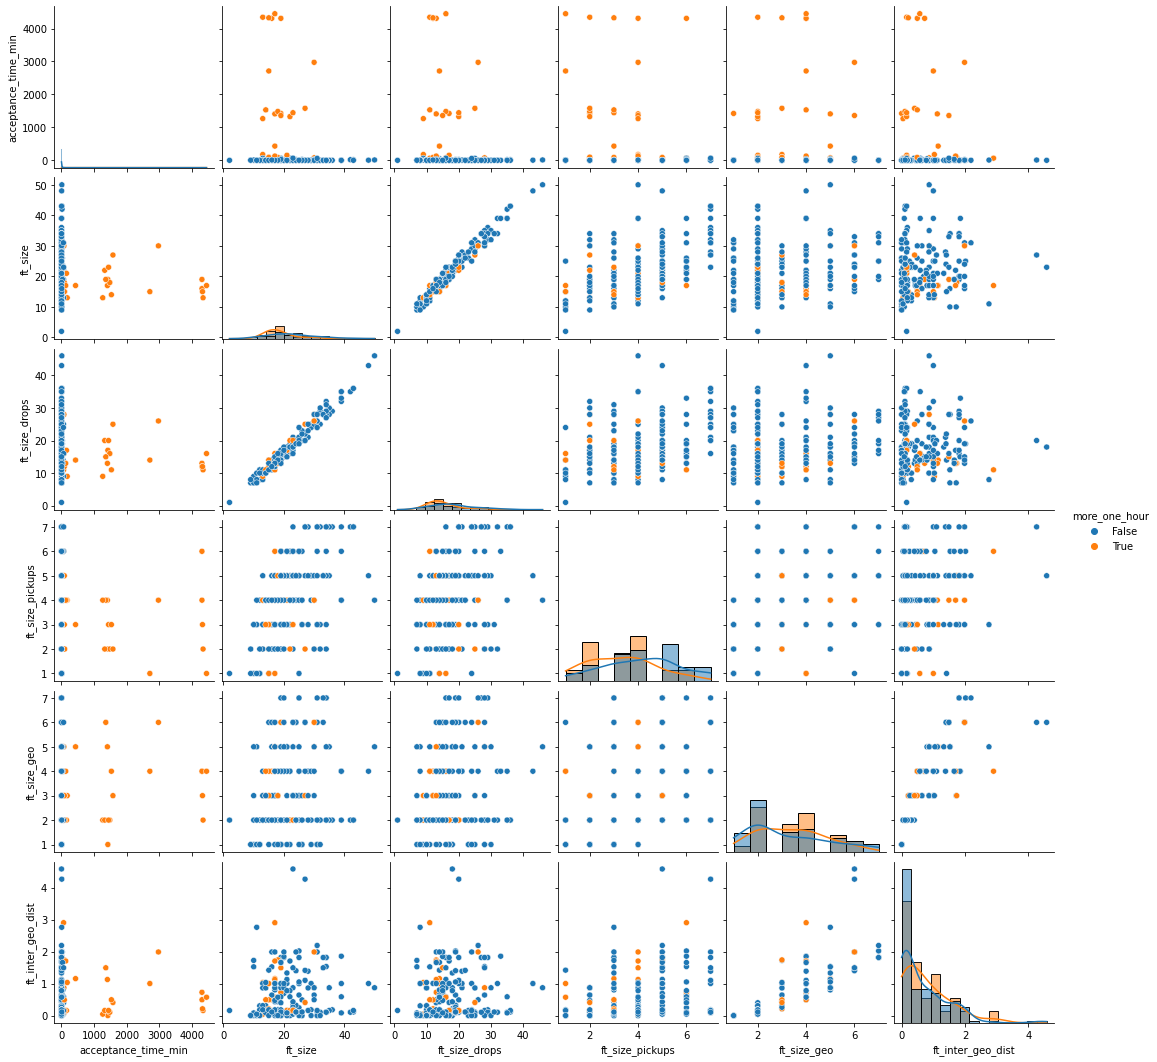

In [4]:
columns_selected = [col for col in time_df.columns if 'has_geo' not in col and 'id' not in col]
sns.pairplot(time_df[columns_selected], hue ='more_one_hour', diag_kind='hist', diag_kws={'stat':'density', 'common_norm':False, 'kde':True})

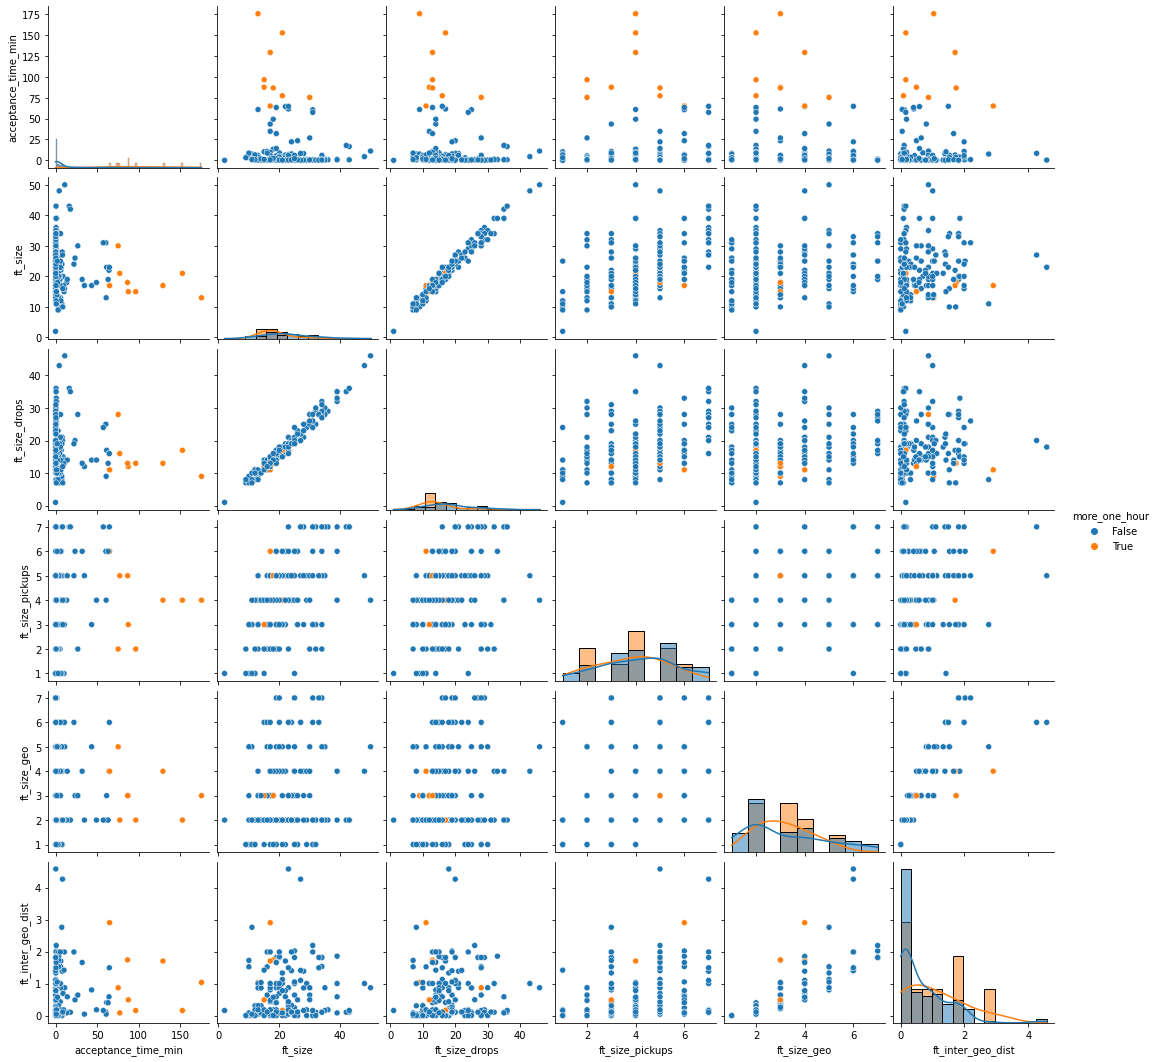

In [5]:
# removing "more than one day" samples we still have a similar distribution
time_df_one_day =  time_df[time_df['acceptance_time_min'] < 60*3]
columns_selected = [col for col in time_df_one_day.columns if 'has_geo' not in col and 'id' not in col]
sns.pairplot(time_df_one_day[columns_selected], hue ='more_one_hour', diag_kind='hist', diag_kws={'stat':'density', 'common_norm':False, 'kde':True})

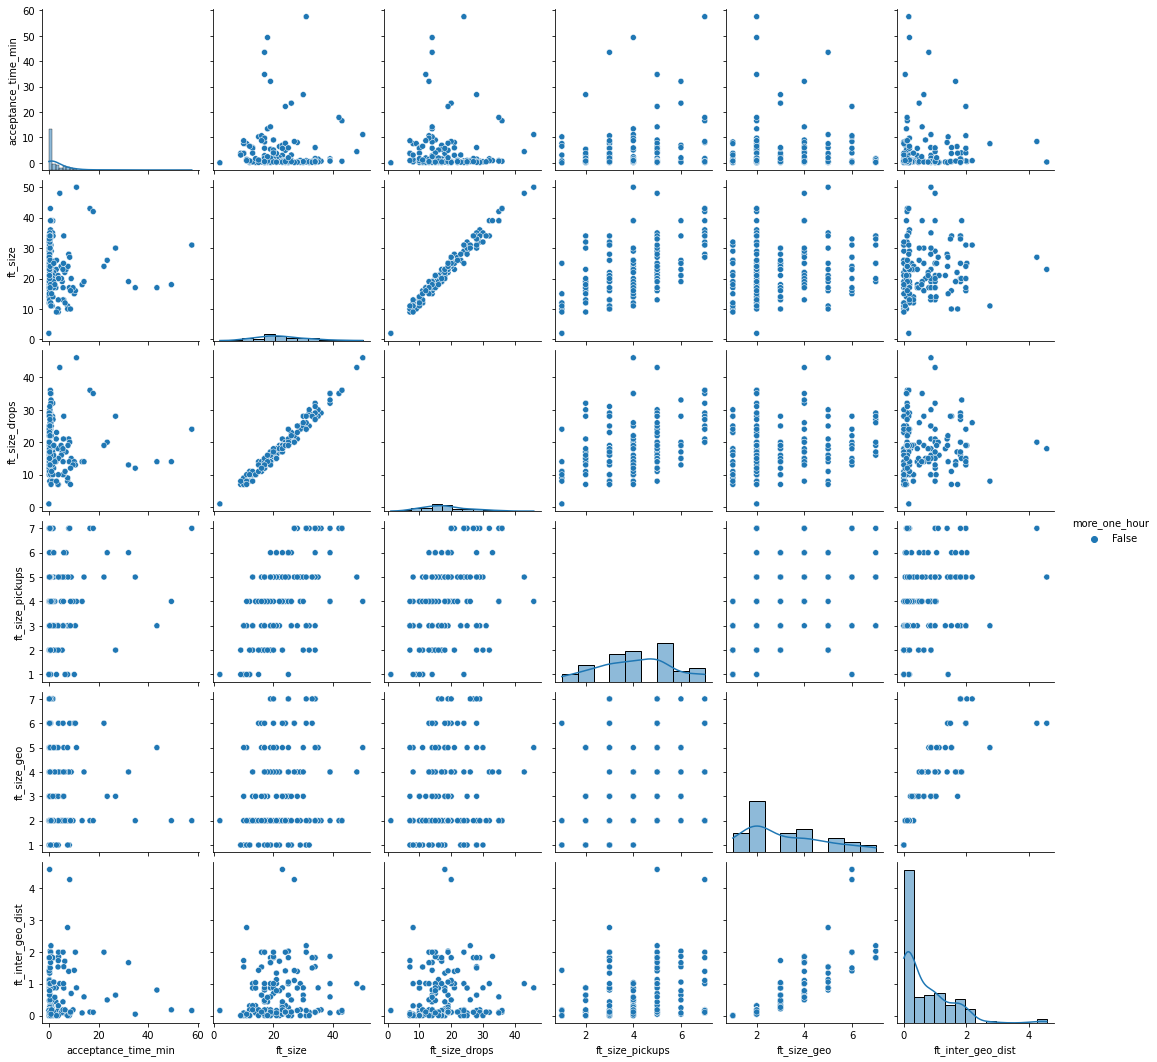

In [6]:
# removing "more than one day" samples we still have a similar distribution
time_df_1hr =  time_df[time_df['acceptance_time_min'] <= 60]
columns_selected = [col for col in time_df_1hr.columns if 'has_geo' not in col and 'id' not in col]
sns.pairplot(time_df_1hr[columns_selected], hue ='more_one_hour', diag_kind='hist', diag_kws={'stat':'density', 'common_norm':False, 'kde':True})

In [7]:
# BASE LINE REG
x_df = time_df[time_df.columns.difference(['acceptance_time_min', 'id_route', 'ft_size', 'more_one_hour'])]
result = OLS(time_df['acceptance_time_min'],x_df).fit_regularized('sqrt_lasso')

with open('summary.txt', 'w') as fh:
    fh.write(OLS(time_df['acceptance_time_min'],x_df).fit().summary().as_text())
OLS(time_df['acceptance_time_min'],x_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     acceptance_time_min   R-squared:                       0.382
Model:                             OLS   Adj. R-squared:                  0.184
Method:                  Least Squares   F-statistic:                     1.935
Date:                 Sat, 16 Oct 2021   Prob (F-statistic):            0.00206
Time:                         13:53:12   Log-Likelihood:                -1440.8
No. Observations:                  183   AIC:                             2972.
Df Residuals:                      138   BIC:                             3116.
Df Model:                           44                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
ft_has_geo_alhué               -4.972e-12    2.5e-12     -1.989      0.049   -9.91e-12   -2.96e-14
ft_has_geo_buin                 -283.1123   1097.319     -0.258      0.797   -2452.845    1886.621
ft_has_geo_calera_de_tango       470.8569    847.773      0.555      0.580   -1205.447    2147.160
ft_has_geo_cerrillos             264.2002    484.276      0.546      0.586    -693.361    1221.761
ft_has_geo_cerro_navia          -263.9130    519.176     -0.508      0.612   -1290.482     762.656
ft_has_geo_colina                -45.4758    452.247     -0.101      0.920    -939.706     848.755
ft_has_geo_conchalí             -593.8154    596.575     -0.995      0.321   -1773.424     585.793
ft_has_geo_curacaví              128.0855   1124.858      0.114      0.910   -2096.101    2352.272
ft_has_geo_el_bosque            1400.6250    262.175      5.342      0.000     882.225    1919.025
ft_has_geo_el_monte               98.6979    279.285      0.353      0.724    -453.534     650.930
ft_has_geo_estación_central      363.0938    476.241      0.762      0.447    -578.578    1304.766
ft_has_geo_huechuraba            116.2608    928.363      0.125      0.901   -1719.396    1951.917
ft_has_geo_independencia         186.5823    360.340      0.518      0.605    -525.920     899.085
ft_has_geo_isla_de_maipo          98.6979    279.285      0.353      0.724    -453.534     650.930
ft_has_geo_la_cisterna          1400.6250    262.175      5.342      0.000     882.225    1919.025
ft_has_geo_la_florida             82.1118    499.992      0.164      0.870    -906.525    1070.748
ft_has_geo_la_granja              50.9477    523.897      0.097      0.923    -984.956    1086.851
ft_has_geo_la_pintana           -166.5503    444.149     -0.375      0.708   -1044.768     711.667
ft_has_geo_la_reina              510.5604    322.182      1.585      0.115    -126.491    1147.612
ft_has_geo_lampa                 424.8727    527.020      0.806      0.422    -617.205    1466.950
ft_has_geo_las_condes             40.1878    371.491      0.108      0.914    -694.362     774.738
ft_has_geo_lo_barnechea          -14.8825    280.873     -0.053      0.958    -570.254     540.489
ft_has_geo_lo_espejo            -279.6988    620.659     -0.451      0.653   -1506.931     947.533
ft_has_geo_lo_prado              300.9301    618.972      0.486      0.628    -922.965    1524.825
ft_has_geo_macul               -2421.8286    584.178     -4.146      0.000   -3576.926   -1266.732
ft_has_geo_maipú                -641.0499    638.788     -1.004      0.317   -1904.128     622.028
ft_has_geo_maría_pinto          -245.3428   1160.698     -0.211      0.833   -2540.396    2049.710
ft_has_geo_melipilla             496.6799   1117.685      0.444      0.657   -1713.322    2706.682
ft_

In [8]:
# only "one day" REG (less than X hours)
time_df_one_day =  time_df[time_df['acceptance_time_min'] < 60*2]
x_df = time_df_one_day[time_df_one_day.columns.difference(['acceptance_time_min', 'id_route', 'ft_size', 'more_one_hour'])]
result = OLS(time_df_one_day['acceptance_time_min'],x_df).fit_regularized('sqrt_lasso')

with open('summary.txt', 'w') as fh:
    fh.write(OLS(time_df_one_day['acceptance_time_min'],x_df).fit().summary().as_text())
OLS(time_df_one_day['acceptance_time_min'],x_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     acceptance_time_min   R-squared:                       0.378
Model:                             OLS   Adj. R-squared:                  0.153
Method:                  Least Squares   F-statistic:                     1.678
Date:                 Sat, 16 Oct 2021   Prob (F-statistic):             0.0151
Time:                         13:53:12   Log-Likelihood:                -679.93
No. Observations:                  163   AIC:                             1448.
Df Residuals:                      119   BIC:                             1584.
Df Model:                           43                                         
Covariance Type:             nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
ft_has_geo_alhué               -2.152e-15   6.48e-14     -0.033      0.974    -1.3e-13    1.26e-13
ft_has_geo_buin                    6.1834     32.661      0.189      0.850     -58.488      70.854
ft_has_geo_calera_de_tango        10.0785     21.398      0.471      0.639     -32.292      52.449
ft_has_geo_cerrillos             -11.2926     12.316     -0.917      0.361     -35.679      13.093
ft_has_geo_cerro_navia            -6.9967     13.539     -0.517      0.606     -33.805      19.811
ft_has_geo_colina                -21.1518     11.432     -1.850      0.067     -43.788       1.485
ft_has_geo_conchalí                2.1201     22.481      0.094      0.925     -42.395      46.635
ft_has_geo_curacaví               61.1168     28.701      2.129      0.035       4.286     117.948
ft_has_geo_el_bosque              -9.2336      4.254     -2.171      0.032     -17.657      -0.810
ft_has_geo_el_monte               16.6476      7.576      2.197      0.030       1.646      31.649
ft_has_geo_estación_central       34.2230     15.678      2.183      0.031       3.179      65.267
ft_has_geo_huechuraba            -11.2847     24.559     -0.459      0.647     -59.913      37.344
ft_has_geo_independencia         -10.9083     13.211     -0.826      0.411     -37.068      15.251
ft_has_geo_isla_de_maipo          16.6476      7.576      2.197      0.030       1.646      31.649
ft_has_geo_la_cisterna            -9.2336      4.254     -2.171      0.032     -17.657      -0.810
ft_has_geo_la_florida              6.8475     16.358      0.419      0.676     -25.543      39.238
ft_has_geo_la_granja              -9.6675     13.173     -0.734      0.464     -35.752      16.417
ft_has_geo_la_pintana             -3.9192     12.052     -0.325      0.746     -27.782      19.944
ft_has_geo_la_reina              -10.9287      8.906     -1.227      0.222     -28.564       6.707
ft_has_geo_lampa                  33.3645     13.611      2.451      0.016       6.414      60.315
ft_has_geo_las_condes            -13.6500     10.071     -1.355      0.178     -33.591       6.291
ft_has_geo_lo_barnechea          -10.8768      7.129     -1.526      0.130     -24.994       3.240
ft_has_geo_lo_espejo               0.6548     15.607      0.042      0.967     -30.249      31.558
ft_has_geo_lo_prado               12.4979     15.682      0.797      0.427     -18.555      43.551
ft_has_geo_macul                   7.3655     19.931      0.370      0.712     -32.101      46.832
ft_has_geo_maipú                 -38.9806     19.316     -2.018      0.046     -77.228      -0.733
ft_has_geo_maría_pinto           -13.2521     29.323     -0.452      0.652     -71.315      44.811
ft_has_geo_melipilla              54.4190     30.400      1.790      0.076      -5.776     114.614
ft_

In [9]:
# removing ft_has_geo features 
ft_has_geo_list = [col for col  in time_df.columns if 'ft_has_geo' in col ]
time_df_one_day =  time_df[time_df['acceptance_time_min'] < 60*2]


x_df = time_df_one_day[time_df_one_day.columns.difference(['acceptance_time_min', 'id_route', 'ft_size', 'more_one_hour'] + ft_has_geo_list)]
result = OLS(time_df_one_day['acceptance_time_min'],x_df).fit_regularized('sqrt_lasso')

with open('summary.txt', 'w') as fh:
    fh.write(OLS(time_df_one_day['acceptance_time_min'],x_df).fit().summary().as_text())
OLS(time_df_one_day['acceptance_time_min'],x_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     acceptance_time_min   R-squared (uncentered):                   0.197
Model:                             OLS   Adj. R-squared (uncentered):              0.177
Method:                  Least Squares   F-statistic:                              9.780
Date:                 Sat, 16 Oct 2021   Prob (F-statistic):                    4.25e-07
Time:                         13:53:12   Log-Likelihood:                         -716.66
No. Observations:                  163   AIC:                                      1441.
Df Residuals:                      159   BIC:                                      1454.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
ft_inter_geo_dist    -0.9630      3.367     -0.286      0.775      -7.613       5.687
ft_size_drops        -0.2780      0.210     -1.323      0.188      -0.693       0.137
ft_size_geo           0.4495      1.499      0.300      0.765      -2.511       3.410
ft_size_pickups       3.0988      0.961      3.226      0.002       1.202       4.996
==============================================================================
Omnibus:                      108.180   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.268
Skew:                           2.663   Prob(JB):                    6.43e-114
Kurtosis:                       9.957   Cond. No.                         47.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# !pip install lxml

# adding square feature 
time_df_one_day =  time_df[time_df['acceptance_time_min'] < 60*2].copy()
time_df_one_day['ft_size_drops_quad'] = time_df_one_day['ft_size_drops'].pow(2)
# time_df_one_day['ft_inter_geo_dist_quad'] = time_df_one_day['ft_inter_geo_dist'].pow(2)
# time_df_one_day['constant'] =  1 

x_df = time_df_one_day[time_df_one_day.columns.difference(['acceptance_time_min', 'id_route', 'ft_size', 'more_one_hour'])]
result = OLS(time_df_one_day['acceptance_time_min'],x_df).fit_regularized('sqrt_lasso')

with open('summary.txt', 'w') as fh:
    fh.write(OLS(time_df_one_day['acceptance_time_min'],x_df).fit().summary().as_text())

results_summary = OLS(time_df_one_day['acceptance_time_min'],x_df, hasconst=True).fit().summary()
results_as_html = results_summary.tables[1].as_html()
summary_pd = pd.read_html(results_as_html, header=0, index_col=0)[0]
pd.options.display.float_format = '{:,.5f}'.format
summary_pd.sort_values(by='coef', inplace=True)

def style_pval(row):
    color = None
    if row.values[3] < 0.10:
        color = 'darkblue'
    return [f'background-color: {color}']*len(row.values)  

summary_pd.style.apply(style_pval, axis=1)

,coef,std err,t,P>|t|,[0.025,0.975]
ft_inter_geo_dist,-50.606900,17.413000,-2.906000,0.004000,-85.090000,-16.124000
ft_has_geo_peñalolén,-39.524200,29.506000,-1.340000,0.183000,-97.954000,18.905000
ft_has_geo_maipú,-38.839200,19.451000,-1.997000,0.048000,-77.358000,-0.321000
ft_has_geo_quinta_normal,-31.847900,21.328000,-1.493000,0.138000,-74.082000,10.386000
ft_has_geo_colina,-21.264300,11.538000,-1.843000,0.068000,-44.112000,1.584000
ft_has_geo_puente_alto,-15.505400,12.399000,-1.251000,0.214000,-40.059000,9.048000
ft_has_geo_ñuñoa,-15.145900,7.093000,-2.135000,0.035000,-29.191000,-1.101000
ft_has_geo_providencia,-14.896500,6.713000,-2.219000,0.028000,-28.189000,-1.604000
ft_has_geo_san_bernardo,-13.897800,19.085000,-0.728000,0.468000,-51.692000,23.896000
ft_has_geo_maría_pinto,-13.752000,29.890000,-0.460000,0.646000,-72.942000,45.438000
